In [1]:
from scipy import stats

In [2]:
help(stats.linregress) # help on linregress

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None, alternative='two-sided')
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis. Default is 'two-sided'.
        The following options are available:
    
        * 'two-sided': the slope of the regression line is nonzero
        * 'less': the slope of the regression line is l

In [3]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime


In [4]:
start=datetime.datetime(2020,1,1)
end=datetime.datetime(2025,1,2)

In [5]:

import yfinance as yf

spy_etf = yf.download('SPY', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [6]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, SPY)   1258 non-null   float64
 1   (High, SPY)    1258 non-null   float64
 2   (Low, SPY)     1258 non-null   float64
 3   (Open, SPY)    1258 non-null   float64
 4   (Volume, SPY)  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [7]:
spy_etf.head()

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2020-01-02,301.194855,301.213415,299.025387,299.961792,59151200
2020-01-03,298.914215,300.054588,297.699684,297.755309,77709700
2020-01-06,300.054565,300.138003,297.013570,297.134101,55653900
2020-01-07,299.210815,299.961784,298.756505,299.479661,40496400
2020-01-08,300.805511,302.038574,299.155231,299.405545,68296000


In [8]:
spy_etf.tail()

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2024-12-24,601.299988,601.340027,595.469971,596.059998,33160100
2024-12-26,601.340027,602.479980,598.080017,599.500000,41219100
2024-12-27,595.010010,597.780029,590.760010,597.539978,64969300
2024-12-30,588.219971,591.739990,584.409973,587.890015,56578800
2024-12-31,586.080017,590.640015,584.419983,589.909973,57052700


In [9]:
start=datetime.datetime(2020,1,1)
end=datetime.datetime(2025,1,2)

In [10]:
apple=yf.download('AAPL',start,end)

[*********************100%***********************]  1 of 1 completed


In [11]:
apple.head() # first 5 rows

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.796028,72.856621,71.545395,71.799881,135480400
2020-01-03,72.088310,72.851776,71.862907,72.020447,146322800
2020-01-06,72.662720,72.701500,70.954010,71.206077,118387200
2020-01-07,72.320976,72.929322,72.100418,72.672409,108872000
2020-01-08,73.484360,73.787323,72.022865,72.022865,132079200


In [12]:
apple.tail() # last 5 rows

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-24,258.200012,258.209991,255.289993,255.490005,23234700
2024-12-26,259.019989,260.100006,257.630005,258.190002,27237100
2024-12-27,255.589996,258.700012,253.059998,257.829987,42355300
2024-12-30,252.199997,253.500000,250.750000,252.229996,35557500
2024-12-31,250.419998,253.279999,249.429993,252.440002,39480700


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

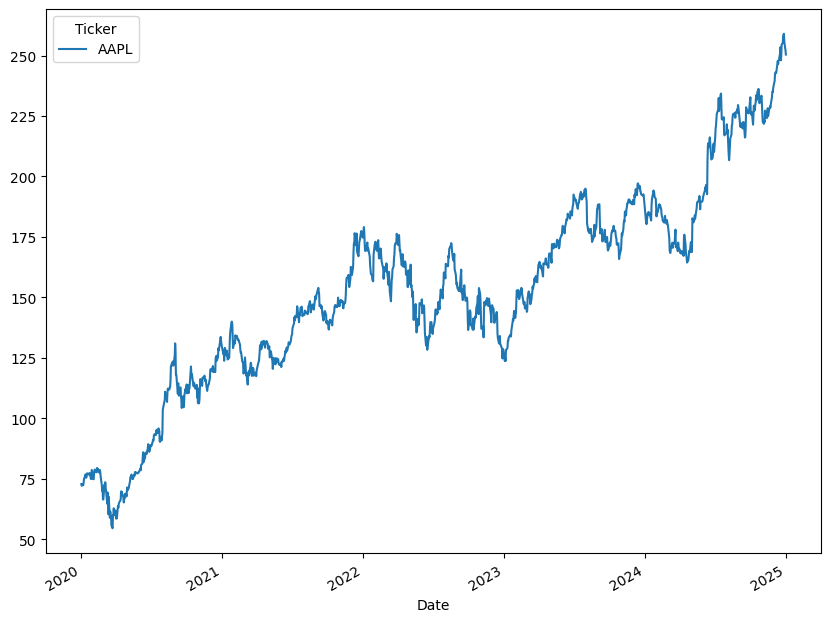

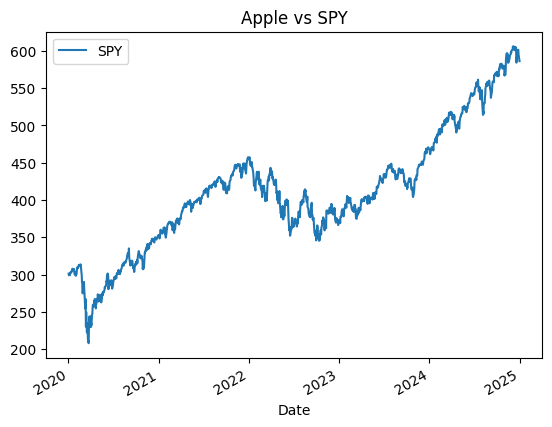

In [14]:
# plot the closing price of apple stock over time and SPY   
apple['Close'].plot(label='AAPL', figsize=(10, 8))
spy_etf['Close'].plot(label='SPY Index')
plt.title("Apple vs SPY")
plt.legend()
plt.show()

In [15]:
apple['Cumulative'] = apple['Close']/apple['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

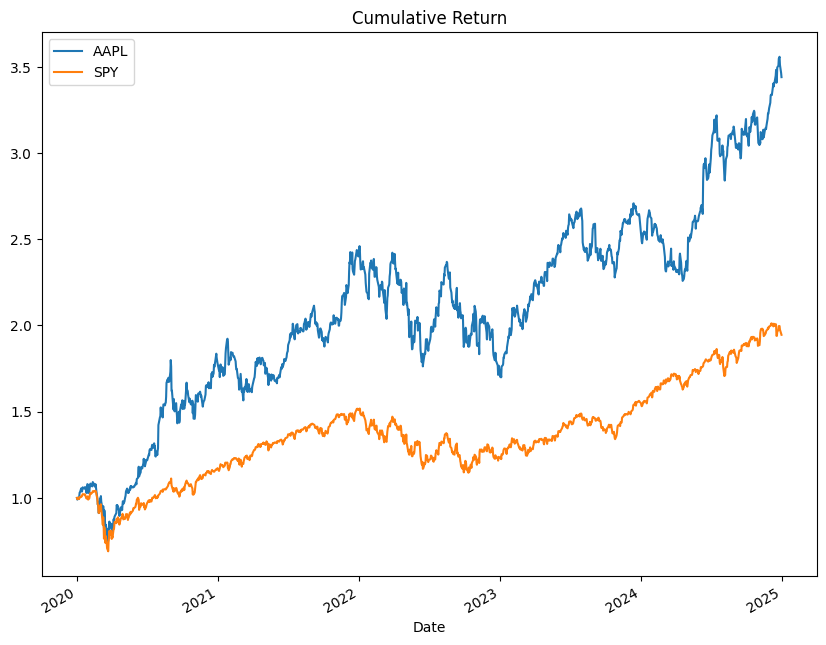

In [16]:
apple['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY')
plt.title('Cumulative Return')
plt.legend()
plt.show()


In [17]:
apple['Daily Return'] = apple['Close'].pct_change(1) # 1 for one day
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1) # 1 for one day


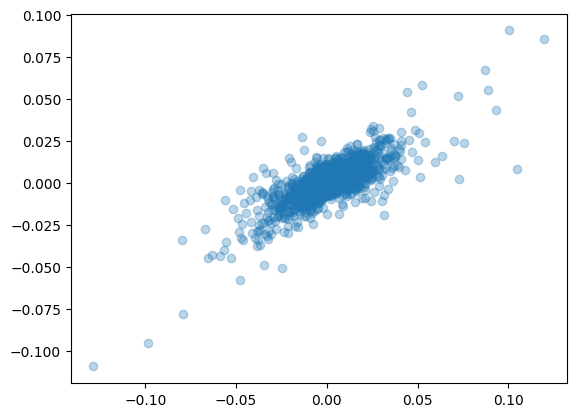

In [18]:
plt.scatter(apple['Daily Return'],spy_etf['Daily Return'],alpha=0.3)

In [19]:
beta,alpha,r_value,p_value,std_err = stats.linregress(apple['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:]) # iloc[1:] to skip the first row

In [20]:
beta # beta value

0.5240460442913526

In [21]:
alpha # alpha value 

-1.8661361005653868e-06

In [22]:
r_value # r value

0.7906282273527355

In [23]:
spy_etf['Daily Return'].head() # first 5 rows

Date
2020-01-02         NaN
2020-01-03   -0.007572
2020-01-06    0.003815
2020-01-07   -0.002812
2020-01-08    0.005330
Name: Daily Return, dtype: float64

In [24]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:])) # noise for the scatter plot 

In [25]:
noise

array([ 3.37796332e-04, -2.51911905e-05, -7.84214043e-04, ...,
        9.59211350e-04,  1.43167022e-03, -9.08534499e-04])

In [28]:
fake_stock  = spy_etf['Daily Return'].iloc[1:] + noise  # fake stock data

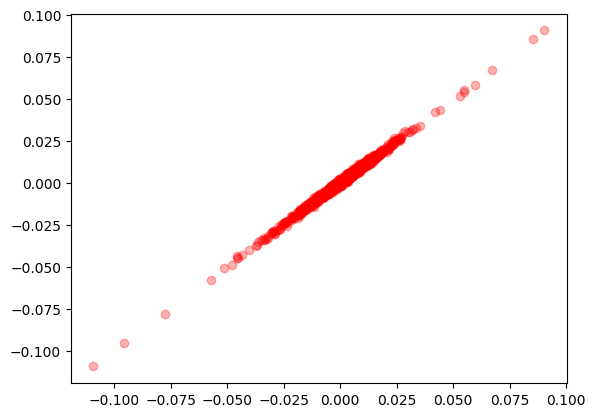

In [31]:
# Align the lengths of fake_stock and spy_etf['Daily Return']
aligned_fake_stock = fake_stock[:len(spy_etf['Daily Return'].iloc[1:])]
aligned_spy_etf_daily_return = spy_etf['Daily Return'].iloc[1:]

plt.scatter(aligned_fake_stock, aligned_spy_etf_daily_return, alpha=0.3, color='red') # scatter plot of fake stock and spy etf


In [32]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aligned_fake_stock,aligned_spy_etf_daily_return) # linear regression of fake stock and spy etf

In [33]:
beta # beta value

0.9924432604637449

In [34]:
alpha # alpha value

9.778929453917065e-05